In [12]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# from sklearn.linear_model import ElasticNet, Lasso, Ridge
# from sklearn.model_selection import KFold, cross_val_score 
# import statsmodels.api as sm

## Read in the multiple .csv files

In [13]:
# read in mulitple csv files
csv_files = ['data/C200_SEC01.csv',
             'data/C200_SEC02.csv',
             'data/C200_SEC04.csv',
             'data/C200_SEC05.csv',
             'data/C200_SEC06.csv',
             'data/C200_SEC07.csv',
             'data/C200_SEC08.csv',
             'data/C200_SEC09.csv',
             'data/C200_SEC10.csv',
             'data/C200_SEC11.csv', 
             'data/C200_SEC12.csv', 
             'data/C200_SEC13.csv', 
             'data/C200_SEC14.csv', 
             'data/C200_SEC15.csv',
             'data/C200_SEC16.csv',
             'data/C200_SEC17.csv',
             'data/C200_SEC18.csv',
             'data/C200_SEC19.csv'
            ]

# Initialize an empty list to store DataFrames
dataframes = []

# Read the first CSV file to get the column headers
initial_df = pd.read_csv(csv_files[0])
initial_columns = initial_df.columns

# Loop through the list of files
for file in csv_files:
    # Read the current CSV file into a DataFrame, ensuring it matches the initial columns
    df = pd.read_csv(file, usecols=lambda column: column in initial_columns).reindex(columns=initial_columns)
       
    # Drop rows where all cells are blank
    df.dropna(how='all', inplace=True)
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
c200_df = pd.concat(dataframes, ignore_index=True)

# Remove the personal data (first and last names) and replace with a key
# Add a unique key index to each student
#c200_df['student_key'] = range(1, len(c200_df) + 1)

# Save the compiled DataFrame
c200_df.to_csv('data/c200_df_compiled_dataframe.csv', index=False)

## Begin cleaning data frame for descriptive analysis

In [14]:
# Listing all column names in the DataFrame
column_names = c200_df.columns.tolist()
print(column_names)

['Last Name', 'First Name', 'Username', 'Learner ID', 'Last Access', 'Availability', 'Weighted Total', 'Total pts', 'C200P1 CTGL 1', 'C200P2 CTGL 2', 'C200A1 Test 2 Essay', 'C200B1 Test 1 US Students', 'C200B1 Test 1 IMS Students']


In [15]:
# Add a 'student key' column with a unique numeric identifier for each student
c200_df['student key'] = range(1, len(c200_df) + 1)

# Now you can select the columns including 'student key'
c200_df = c200_df[['Learner ID', 'Weighted Total', 'Total pts', 'C200P1 CTGL 1', 'C200P2 CTGL 2', 'C200A1 Test 2 Essay', 'C200B1 Test 1 US Students', 'C200B1 Test 1 IMS Students', 'student key']]

# Save the modified DataFrame
c200_df.to_csv('data/c200_df_modified.csv', index=False)


In [16]:
# Assuming you want to keep columns named 
c200_df = c200_df[['Learner ID',
                   'Weighted Total',
                   'Total pts',
                   'C200P1 CTGL 1',
                   'C200P2 CTGL 2',
                   'C200A1 Test 2 Essay',
                   'C200B1 Test 1 US Students',
                   'C200B1 Test 1 IMS Students',
                   'student key']]
# new df
c200_df.to_csv('data/c200_df_modified.csv', index=False)

In [17]:
# Define a new list of column names
new_column_names = ['SG',
                   'Wt_total', 
                   'Total_pts',
                   'CTGL_1',
                   'CTGL_2',
                   'Essay',
                   'BB_exam_us',
                   'BB_exam_ims',
                   'student_key',
                   ] # Continue this list to match the number of columns in DataFrame

# Assign the new column names to the DataFrame
c200_df.columns = new_column_names

In [18]:
# Listing all column names in the DataFrame
column_names = c200_df.columns.tolist()
print(column_names)

['SG', 'Wt_total', 'Total_pts', 'CTGL_1', 'CTGL_2', 'Essay', 'BB_exam_us', 'BB_exam_ims', 'student_key']


In [55]:
# Assuming column 12 is '' for US and column 12 is 'M200B1 BB_exam_ims' for international
# This will create a new column 'Combined_Scores' which has all scores, prioritizing US scores and filling in missing values with International scores.
c200_df['Combined_Scores'] = c200_df['BB_exam_us'].combine_first(c200_df['BB_exam_ims'])

# Save the updated DataFrame
c200_df.to_csv('data/c200_df_compiled_dataframe_scores_combined.csv', index=False)

In [20]:
c200_df.head()

,SG,Wt_total,Total_pts,CTGL_1,CTGL_2,Essay,BB_exam_us,BB_exam_ims,student_key,Combined_Scores
0,01C,95.38322,374.34050,92.3940,90.99750,98.949,92.0,NaN,1,92.0
1,01A,93.45000,375.00000,93.0000,90.00000,92.0,100.0,NaN,2,100.0
2,01A,92.15000,370.00000,93.0000,90.00000,91.0,96.0,NaN,3,96.0
3,01D,92.01205,366.29008,87.0000,91.09425,92.19583,NaN,96.0,4,96.0
4,01C,94.30665,375.58875,90.9975,90.39600,94.19525,100.0,NaN,5,100.0


In [51]:
c200_df.tail()

,SG,Wt_total,Total_pts,CTGL_1,CTGL_2,Essay,BB_exam_us,BB_exam_ims,student_key,Combined_Scores
1056,19B,97.07,387.49,94.50,95.99,97.00,100.0,NaN,1057,100.0
1057,19D,96.05,385.08,93.99,95.99,95.10,100.0,NaN,1058,100.0
1058,19D,89.91,354.64,93.19,91.39,94.05,76.0,NaN,1059,76.0
1059,19D,89.83,360.54,98.40,87.99,90.15,84.0,NaN,1060,84.0
1060,19C,90.80,366.29,95.00,90.00,89.29,92.0,NaN,1061,92.0


## Begin descriptive analysis

In [52]:
# details the number of rows, columns- determines number of studnets in dataframe
c200_df.shape

(1061, 10)

In [54]:
pd.set_option('display.precision',2)

description = c200_df[['CTGL_1', 'CTGL_2', 'Essay', 'BB_exam_us', 'BB_exam_ims','Combined_Scores']].describe()

print(description)

        CTGL_1   CTGL_2    Essay  BB_exam_us  BB_exam_ims  Combined_Scores
count  1060.00  1060.00  1060.00      941.00       120.00          1061.00
mean     94.27    93.48    92.24       91.57        88.27            91.20
std       2.96     3.22     4.51        9.32        12.42             9.77
min      84.50    80.00    66.29       44.00        40.00            40.00
25%      92.00    91.50    89.69       88.00        84.00            88.00
50%      94.27    94.00    92.65       96.00        92.00            96.00
75%      96.00    95.99    95.61      100.00       100.00           100.00
max     100.00   100.00   100.00      100.00       100.00           100.00


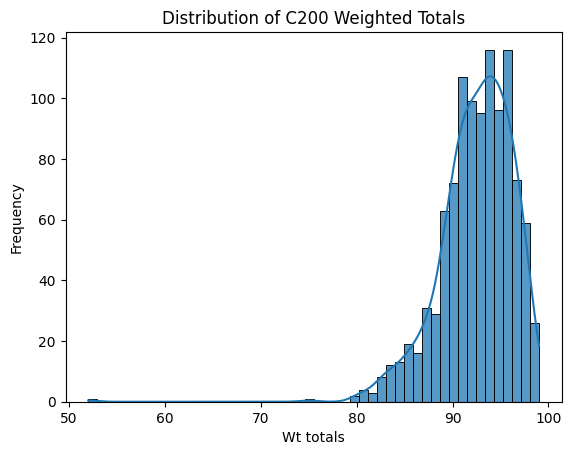

In [26]:
# Assuming 'm200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(c200_df['Wt_total'].dropna(),kde=True, bins=50, alpha=0.75)
plt.title('Distribution of C200 Weighted Totals')
plt.xlabel('Wt totals')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/c200_df_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

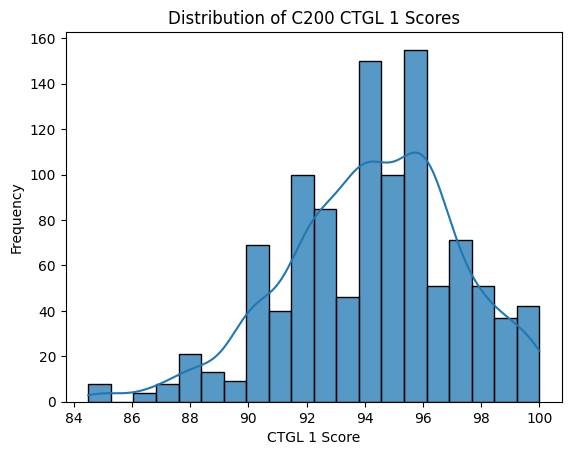

In [33]:
# Assuming 'c200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(c200_df['CTGL_1'].dropna(),kde=True, bins=20, alpha=0.75)
plt.title('Distribution of C200 CTGL 1 Scores')
plt.xlabel('CTGL 1 Score')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/c200_df_ctgl_1.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

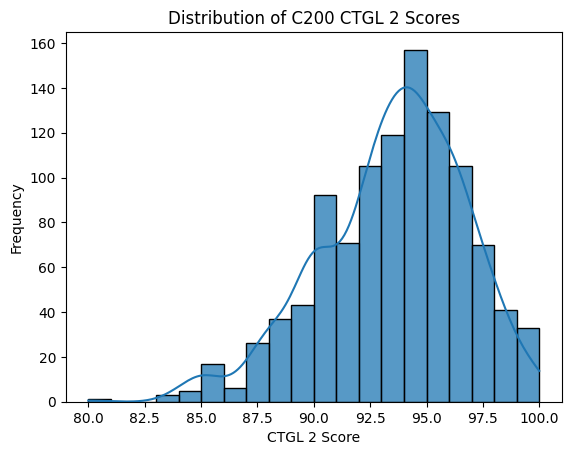

In [39]:
# Assuming 'c200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(c200_df['CTGL_2'].dropna(),kde=True, bins=20, alpha=0.75)
plt.title('Distribution of C200 CTGL 2 Scores')
plt.xlabel('CTGL 2 Score')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/c200_df_ctgl_2.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

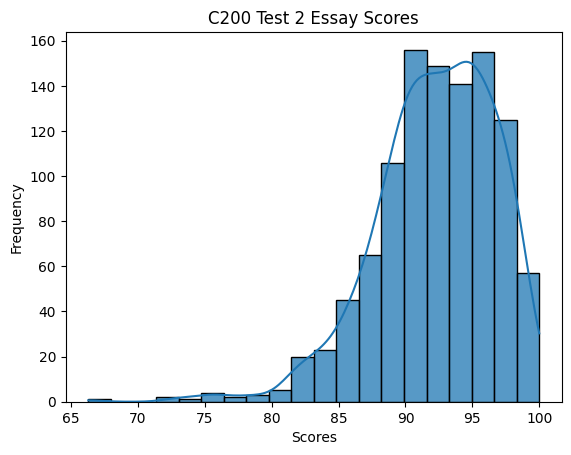

In [45]:
# Assuming 'c200_df' is your DataFrame and 'Essay' is the column you're interested in
sns.histplot(c200_df['Essay'].dropna(), kde=True, bins=20, alpha=0.75)
plt.title('C200 Test 2 Essay Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/c200_df_essay.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()